In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# 使用相对路径从项目根目录加载数据文件
data_path = Path("../../Data/machine/Anomaly_Data/Duration_of_Anomalies_cleaned.parquet")

# 加载数据
df = pd.read_parquet(data_path)

# 显示前几行，了解数据结构
print("数据集信息:")
print(f"总行数: {df.shape[0]}")
print(f"总列数: {df.shape[1]}")
print("\n前5行数据:")
df.head()


数据集信息:
总行数: 5893
总列数: 9

前5行数据:


,Condition,Comment,Station,Line,Date,Shift,Downtime,StartTime,EndTime
0,Ms,MS0301 Taktzeit nicht erreicht,Kontaktieren,E08Usv01-Vm,"15.01.2024, 03:36:40",Nacht,0 days 00:06:40,2024-01-15 02:36:40+00:00,2024-01-15 02:43:20+00:00
1,Ms,MS0301 Taktzeit nicht erreicht,Kontaktieren,E08Usv01-Vm,"15.01.2024, 02:42:03",Nacht,0 days 00:12:03,2024-01-15 01:42:03+00:00,2024-01-15 01:54:06+00:00
2,Ms,MS0301 Taktzeit wird nicht erreicht,Kontaktieren,E08Usv01-Vm,"16.01.2024, 02:40:00",Nacht,0 days 00:10:00,2024-01-16 01:40:00+00:00,2024-01-16 01:50:00+00:00
3,Ms,MS0301 Taktzeit wird nicht erreicht,Kontaktieren,E08Usv01-Vm,"16.01.2024, 03:40:30",Nacht,0 days 00:10:30,2024-01-16 02:40:30+00:00,2024-01-16 02:51:00+00:00
4,Ms,MS0301 Taktzeit wird nicht erreicht,Kontaktieren,E08Usv01-Vm,"09.08.2024, 07:13:45",Früh,0 days 00:13:45,2024-08-09 05:13:45+00:00,2024-08-09 05:27:30+00:00


In [25]:
# 查看数据的列名
print("列名:")
print(df.columns.tolist())

# 查看Station列的唯一值
print("\n唯一的Station值:")
print(df['Station'].unique())


列名:
['Condition', 'Comment', 'Station', 'Line', 'Date', 'Shift', 'Downtime', 'StartTime', 'EndTime']

唯一的Station值:
['Kontaktieren' 'Pcb' 'Ringmontage']


In [26]:
# 过滤出Station为"Kontaktieren"的数据
kontaktieren_data = df[df['Station'] == 'Kontaktieren']

# 显示筛选后的数据基本信息
print(f"'Kontaktieren'站点的数据行数: {kontaktieren_data.shape[0]}")
print("\n前5行筛选后的数据:")
kontaktieren_data.head()


'Kontaktieren'站点的数据行数: 3167

前5行筛选后的数据:


,Condition,Comment,Station,Line,Date,Shift,Downtime,StartTime,EndTime
0,Ms,MS0301 Taktzeit nicht erreicht,Kontaktieren,E08Usv01-Vm,"15.01.2024, 03:36:40",Nacht,0 days 00:06:40,2024-01-15 02:36:40+00:00,2024-01-15 02:43:20+00:00
1,Ms,MS0301 Taktzeit nicht erreicht,Kontaktieren,E08Usv01-Vm,"15.01.2024, 02:42:03",Nacht,0 days 00:12:03,2024-01-15 01:42:03+00:00,2024-01-15 01:54:06+00:00
2,Ms,MS0301 Taktzeit wird nicht erreicht,Kontaktieren,E08Usv01-Vm,"16.01.2024, 02:40:00",Nacht,0 days 00:10:00,2024-01-16 01:40:00+00:00,2024-01-16 01:50:00+00:00
3,Ms,MS0301 Taktzeit wird nicht erreicht,Kontaktieren,E08Usv01-Vm,"16.01.2024, 03:40:30",Nacht,0 days 00:10:30,2024-01-16 02:40:30+00:00,2024-01-16 02:51:00+00:00
4,Ms,MS0301 Taktzeit wird nicht erreicht,Kontaktieren,E08Usv01-Vm,"09.08.2024, 07:13:45",Früh,0 days 00:13:45,2024-08-09 05:13:45+00:00,2024-08-09 05:27:30+00:00


In [27]:
# 检查Downtime数据列的基本统计信息
print("Downtime统计信息:")
downtime_stats = kontaktieren_data['Downtime'].describe()
print(downtime_stats)

# 检查是否有缺失值
print(f"\nDowntime缺失值数量: {kontaktieren_data['Downtime'].isna().sum()}")


Downtime统计信息:
count                         3167
mean     0 days 00:17:44.400378907
std      0 days 00:14:49.718631540
min                0 days 00:00:00
25%                0 days 00:07:24
50%                0 days 00:12:28
75%                0 days 00:22:08
max                0 days 01:00:00
Name: Downtime, dtype: object

Downtime缺失值数量: 0


In [28]:
# Convert Downtime from timedelta format to minutes for visualization
# This removes the "0 days" prefix and makes the charts more readable
downtime_minutes = kontaktieren_data['Downtime'].dt.total_seconds() / 60
print("First 5 values converted to minutes:")
print(downtime_minutes.head())


First 5 values converted to minutes:
0     6.666667
1    12.050000
2    10.000000
3    10.500000
4    13.750000
Name: Downtime, dtype: float64


<Figure size 1400x1000 with 0 Axes>

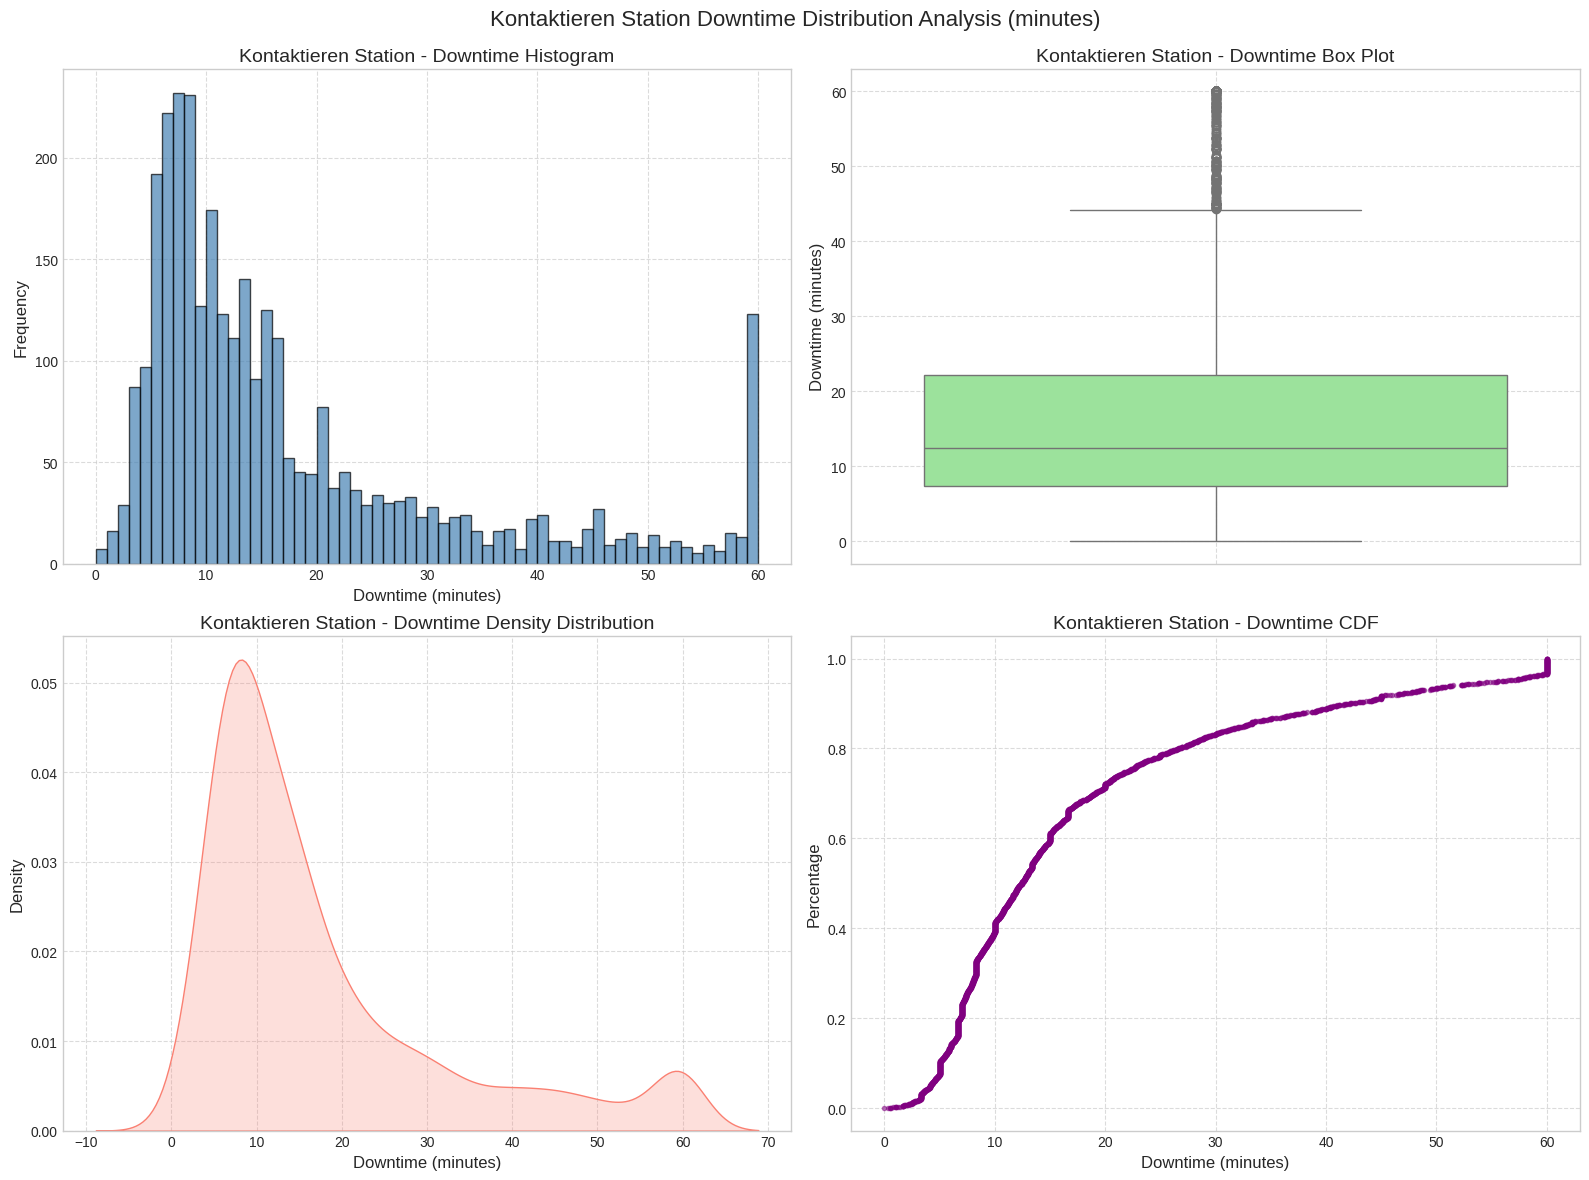

In [29]:
# Create charts: set style and figure size
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 10))

# Create subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram - using the converted minutes data with 1-minute intervals
axes[0, 0].hist(downtime_minutes, bins=np.arange(0, 61, 1), alpha=0.7, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Kontaktieren Station - Downtime Histogram', fontsize=14)
axes[0, 0].set_xlabel('Downtime (minutes)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# 2. Box plot - using the converted minutes data
sns.boxplot(y=downtime_minutes, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Kontaktieren Station - Downtime Box Plot', fontsize=14)
axes[0, 1].set_ylabel('Downtime (minutes)', fontsize=12)
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# 3. Kernel density estimation - using the converted minutes data
sns.kdeplot(data=downtime_minutes, fill=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Kontaktieren Station - Downtime Density Distribution', fontsize=14)
axes[1, 0].set_xlabel('Downtime (minutes)', fontsize=12)
axes[1, 0].set_ylabel('Density', fontsize=12)
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# 4. Cumulative distribution function - using the converted minutes data
sorted_data = np.sort(downtime_minutes)
cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, cumulative, marker='.', linestyle='none', alpha=0.5, color='purple')
axes[1, 1].set_title('Kontaktieren Station - Downtime CDF', fontsize=14)
axes[1, 1].set_xlabel('Downtime (minutes)', fontsize=12)
axes[1, 1].set_ylabel('Percentage', fontsize=12)
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout and add title
plt.tight_layout()
fig.suptitle('Kontaktieren Station Downtime Distribution Analysis (minutes)', fontsize=16)
plt.subplots_adjust(top=0.93)

# Show the plots
plt.show()

